In [196]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt


%matplotlib inline 
plt.style.use('ggplot')

In [252]:
loan = pd.read_csv('~/Documents/Data Science/Datasets/lending-club-loan-data/ScoreCard Features.csv')
loan.columns

Index(['emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'term', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_amnt', 'loan_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'next_pymnt_d',
       'loan_amnt.1', 'funded_amnt', 'funded_amnt_inv', 'term.1', 'int_rate',
       'installment', 'grade', 'sub_grade', 'issue_d', 'initial_list_status'],
      dtype='object')

In [253]:
loan[['loan_status', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
      'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 
      'open_acc', 'total_acc', 'pub_rec', 'revol_bal','revol_util',
      'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
      'tot_cur_bal', 'total_rev_hi_lim']].head(10)

,loan_status,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,open_acc,total_acc,pub_rec,revol_bal,revol_util,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,Fully Paid,10+ years,RENT,24000.0,27.65,0.0,1.0,NaN,NaN,NaN,3.0,9.0,0.0,13648.0,83.7,0.0,0.0,NaN,NaN,NaN
1,Charged Off,< 1 year,RENT,30000.0,1.00,0.0,5.0,NaN,NaN,NaN,3.0,4.0,0.0,1687.0,9.4,0.0,0.0,NaN,NaN,NaN
2,Fully Paid,10+ years,RENT,12252.0,8.72,0.0,2.0,NaN,NaN,NaN,2.0,10.0,0.0,2956.0,98.5,0.0,0.0,NaN,NaN,NaN
3,Fully Paid,10+ years,RENT,49200.0,20.00,0.0,1.0,35.0,NaN,NaN,10.0,37.0,0.0,5598.0,21.0,0.0,0.0,NaN,NaN,NaN
4,Current,1 year,RENT,80000.0,17.94,0.0,0.0,38.0,NaN,NaN,15.0,38.0,0.0,27783.0,53.9,0.0,0.0,NaN,NaN,NaN
5,Fully Paid,3 years,RENT,36000.0,11.20,0.0,3.0,NaN,NaN,NaN,9.0,12.0,0.0,7963.0,28.3,0.0,0.0,NaN,NaN,NaN
6,Current,8 years,RENT,47004.0,23.51,0.0,1.0,NaN,NaN,NaN,7.0,11.0,0.0,17726.0,85.6,0.0,0.0,NaN,NaN,NaN
7,Fully Paid,9 years,RENT,48000.0,5.35,0.0,2.0,NaN,NaN,NaN,4.0,4.0,0.0,8221.0,87.5,0.0,0.0,NaN,NaN,NaN
8,Charged Off,4 years,OWN,40000.0,5.55,0.0,2.0,NaN,NaN,NaN,11.0,13.0,0.0,5210.0,32.6,0.0,0.0,NaN,NaN,NaN
9,Charged Off,< 1 year,RENT,15000.0,18.08,0.0,0.0,NaN,NaN,NaN,2.0,3.0,0.0,9279.0,36.5,0.0,0.0,NaN,NaN,NaN


In [254]:
# convert response factor variable to dummy variable
loan['loan_status'].value_counts(normalize=True)
loan = loan.assign(co_flag=(loan['loan_status'].isin(['Charged Off', 'Late (31-120 days)'])))
# True = 6%, False = 94% Therefore need to take care of imbalance data later. 

# Step 1. Transform original uw variables: 
### 1) define target (co_flag)
### 2) transform earliest_cr_line to MIF 
### 3) binnig continuous variables (Low hanging fruit: those that can be captured using 2 groups (0 vs >0):
1) pub_rec,
2) collections_12_mths_ex_med,
3) acc_now_delinq,

======================= GOOD PRACTICE TO USE FILLNA() BEFORE APPLY()   ==================

4) tot_coll_amt (tricky.. don't know why isnull().sum !=)  

In [204]:
loan['earliest_cr_line'][1].split('-')[1]
# can use 12*(year2 - year1) + (month2-month1+1) to calculate total number of months, 
# if two datetime are formatted as in numeric 

['Apr', '1999']

In [255]:
# earliest_cr_line convert into mths_since_earliest_cr_line
# RECALL: from ETL notebook, based on last_credit_pull_d, 80%+ Jan-2016 -->  take 1/31/2016 as entry_dt 
loan['MIF'] = loan['earliest_cr_line'].fillna('missing') \
                                      .apply(lambda x: None if x=='missing' \
                                             else round((dt.datetime(2016,1,31) - dt.datetime.strptime('01-'+ str(x), '%d-%b-%Y')).days/30 ,0)
                                            )                

In [209]:
# Check distribution of uw features:
# low-hanging fruit: 75% same as min, then we can just bin var into 2 groups
loan[['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
      'MIF', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 
      'open_acc', 'total_acc', 'pub_rec', 'revol_bal','revol_util',
      'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
      'tot_cur_bal', 'total_rev_hi_lim']].describe()

,annual_inc,dti,delinq_2yrs,inq_last_6mths,MIF,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,open_acc,total_acc,pub_rec,revol_bal,revol_util,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,433067.000000,221703.000000,137053.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887234.000000,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,7.502759e+04,18.157039,0.314442,0.694623,217.979966,34.063798,44.104838,70.117903,11.548469,25.268026,0.195307,1.692079e+04,55.067693,0.014380,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,6.469830e+04,17.190626,0.862244,0.998448,90.542016,21.884940,22.179841,28.127914,5.317313,11.840561,0.582091,2.242679e+04,23.834344,0.134191,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,0.000000e+00,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.500000e+04,11.910000,0.000000,0.000000,155.000000,15.000000,27.000000,51.000000,8.000000,17.000000,0.000000,6.443000e+03,37.700000,0.000000,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,6.500000e+04,17.650000,0.000000,0.000000,200.000000,31.000000,44.000000,70.000000,11.000000,24.000000,0.000000,1.187500e+04,56.000000,0.000000,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,9.000000e+04,23.950000,0.000000,1.000000,264.000000,50.000000,61.000000,92.000000,14.000000,32.000000,0.000000,2.082900e+04,73.600000,0.000000,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,9.500000e+06,9999.000000,39.000000,33.000000,878.000000,188.000000,188.000000,129.000000,90.000000,169.000000,86.000000,2.904836e+06,892.300000,20.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [558]:
loan[['purpose', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
      'MIF', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 
      'open_acc', 'total_acc', 'pub_rec', 'revol_bal','revol_util',
      'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
      'tot_cur_bal', 'total_rev_hi_lim']].isnull().sum().sort_values()

# get rid of missing == 29 (missing seems to have pattern --> not randomly missing) and 4 

purpose                             0
acc_now_delinq                      0
revol_bal                           0
pub_rec                             0
total_acc                           0
open_acc                            0
inq_last_6mths                      0
delinq_2yrs                         0
dti                                 0
annual_inc                          0
MIF                                 0
collections_12_mths_ex_med        116
revol_util                        473
tot_cur_bal                     70247
tot_coll_amt                    70247
total_rev_hi_lim                70247
mths_since_last_delinq         454283
mths_since_last_major_derog    665647
mths_since_last_record         750297
dtype: int64

In [516]:
print(loan.shape)
loan = loan.loc[(~loan['annual_inc'].isnull()) & (~loan['acc_now_delinq'].isnull()) \
                & (~loan['pub_rec'].isnull()) & (~loan['total_acc'].isnull()) & (~loan['open_acc'].isnull()) \
                & (~loan['MIF'].isnull()) & (~loan['inq_last_6mths'].isnull()) & (~loan['delinq_2yrs'].isnull()) 
               ]

print(loan.shape)

(887379, 49)
(887350, 49)


## Transformed table --> loan_t

In [559]:
loan_t = pd.concat([loan['co_flag'], \
                    loan['purpose'], \
                    loan['emp_length'], \
                    loan['home_ownership'].apply(lambda x: x if x in ['MORTGAGE', 'OWN'] else 'RENT')], \
                   axis=1)

In [232]:
print(loan['tot_coll_amt'][1:4].isnull())

# boolean of None returns False. Confusing: don't know why isnull().sum != (is None)

print(bool(loan['tot_coll_amt'][1]))
print(loan['tot_coll_amt'].quantile(0.8), loan['tot_coll_amt'].quantile(0.9), loan['tot_coll_amt'].quantile(0.95))

1    True
2    True
3    True
Name: tot_coll_amt, dtype: bool
True
0.0 160.0 635.0


In [235]:
print(loan['tot_coll_amt'].fillna(1).apply(lambda x: 1 if x==1 else 0).sum())
print(loan['tot_coll_amt'].isnull().sum())
## IMPORTANCE OF VALIDATING THE TRANSFORMATION --> FILLNA()

70276
70276


In [237]:
for var in ['pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt']:
    print(loan[var].isnull().sum()/loan.shape[0], \
          loan[var].quantile(0.75), \
          loan[var].quantile(0.8), \
          loan[var].quantile(0.85), \
          loan[var].quantile(0.9), \
          loan[var].quantile(0.95))

3.2680511934584885e-05 0.0 0.0 1.0 1.0 1.0
0.00016340255967292442 0.0 0.0 0.0 0.0 0.0
3.2680511934584885e-05 0.0 0.0 0.0 0.0 0.0
0.07919502264534094 0.0 0.0 0.0 160.0 635.0


In [560]:
# Low hanging fruit (easy binning):
for var in ['pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq']:
    loan_t[var] = loan[var].fillna(0).apply(lambda x: 'None' if x==0 else 'Yes')

    
loan_t['tot_coll_amt'] = loan['tot_coll_amt'].fillna(0) \
                         .apply(lambda x: 'None/Within $100' if x<=100 else '$100+')
loan_t.head(5)

,co_flag,purpose,emp_length,home_ownership,pub_rec,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt
0,False,credit_card,10+ years,RENT,None,None,None,None/Within $100
1,True,car,< 1 year,RENT,None,None,None,None/Within $100
2,False,small_business,10+ years,RENT,None,None,None,None/Within $100
3,False,other,10+ years,RENT,None,None,None,None/Within $100
4,False,other,1 year,RENT,None,None,None,None/Within $100


In [519]:
# first version of bucketing. <=$100 only 2.5%. Check WOE, see whether differentiation is similar to None 
# to decide necessity to keep this group.
loan_t['tot_coll_amt'].value_counts(normalize=True)

None/Within $100    0.894552
$100+               0.105448
Name: tot_coll_amt, dtype: float64

# Step 2. Write functions to: 
# 1) bin continuous variables based on quantile
# 2) calculate Weight of Evidence
# 3) calculate Information Value 
### For categorical var, check WOE first to futher determine how to bin. 

In [485]:
def binning_left_skewed(df, x):
    a_low_25 = df[x].quantile(.25)
    b_mid_low_25 = df[x].quantile(.5)
    c_mid_high_25 = df[x].quantile(.75)
    d_high = df[x].quantile(.9)
    
    
    def condition(x, a=a_low_25, b=b_mid_low_25, c=c_mid_high_25, d=d_high):
        if x == -1:
            cat = 'missing/none'
        elif x <= a:
            cat = '1st_quantile'
        elif x <= b:
            cat = '2nd_quantile'
        elif x <= c:
            cat = '3rd_quantile'
        elif x <= d:
            cat = '75_to_90_pctile'
        else:
            cat = 'top_10_pctile'
        
        return cat
    
    
    return df[x].fillna(-1).apply(lambda x: condition(x))

In [531]:
def woe(df, x, y):
    '''
    x should be discretized varialbes (categorical variables or continuous var transformed by binning
    '''
     
    
    total_true = df[y].sum()
    total_false = len(df[y]) - total_true
    
    woe = df[[x,y]].fillna('missing').groupby(x).agg({y: lambda s: s.astype(int).sum()}) \
                   .join(df[[x,y]].fillna('missing').groupby(x).agg({y: lambda s: (1 - s.astype(int)).sum()}), \
                         how='outer', lsuffix='_true', rsuffix='_false')
    
    woe = woe.assign(y_true_dist = woe[y+'_true'] / float(total_true), \
                     y_false_dist = woe[y+'_false'] / float(total_false), \
                     true_prob = woe[y+'_true'].astype(float) / (woe[y+'_true'] + woe[y+'_false']))
    '''
    IMPORTANT! REMOVE BINS y_false_dist == 0 or y_true_dist == 0 TO AVOID UNDEFINED!
    '''
    
    woe = woe[(woe['co_flag_true'] > 0) & (woe['co_flag_false'] > 0)]
    
    woe['woe_bin'] = np.log(woe['y_true_dist'] / woe['y_false_dist']) * 100 
                         
    return woe

In [480]:
def plot_woe(df, x, y):
    df_woe = woe(df, x, y)
    
    df_woe['woe_bin'].sort_values().plot(kind='bar')
    
    ax.set_title('Weight of Evidence for {}'.format(x.upper()))
    ax.set_xlabel('')  
    

In [532]:
def iv(df, y):
    '''
    Information value is used to evaluate a feature's predictive power. 
    This function takes in DataFrame and name of target variable, 
    then evaluate Information Value of the remaining features.
    In the end, the function returns a DataFrame with IV sorted in descending order
    '''
    features = df.columns.tolist()
    features.remove(y)
    
    output = pd.DataFrame()
    
    for f in features:
        woe_f = woe(df, f, y).reset_index()

        woe_f.rename(columns={f:"bin"}, inplace=True)
       
        woe_f = woe_f.assign(feature = f, \
                             iv_bin = (woe_f['y_true_dist'] - woe_f['y_false_dist']) * woe_f['woe_bin'] / 100
                            )

        iv_total = woe_f['iv_bin'].sum()
        woe_f['iv_total'] = iv_total
        
        # stack woe for f feature with existing output
        output = pd.concat([output, woe_f], axis=0, ignore_index=True) 
        
    
    
    tmp1 = output['feature']
    output.drop('feature', axis=1, inplace=True)
    
    return pd.concat([tmp1, output], axis=1)
    

# Step 3. Apply binning_left_skewed 

In [561]:
for var in ['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
            'MIF', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 
            'open_acc', 'total_acc', 
            'revol_bal','revol_util', 'tot_cur_bal', 'total_rev_hi_lim']:
    
    loan_t[var] = binning_left_skewed(loan, var)

In [562]:
loan_t.shape

(887350, 22)

In [435]:
# plot stacked normalized bar chart, observed dist post-binning:
def stacked_normalized_bar_chart(df, x):
    cat = df[x].unique().tolist()
    cat_num = len(cat)
    total = len(df[x])
    
    cat_bottom = 0
    plots = []
    
    for i in np.arange(cat_num):
        cat_weight = ((df[x] == cat[i]).sum() / total)
        cat_p = plt.bar(1, cat_weight, bottom = cat_bottom)
        
        cat_bottom += cat_weight
        plots.append(cat_p)
    
    plt.xticks([])  # disable xticks
    plots.reverse()
    cat.reverse()
    plt.legend((p for p in plots), (l for l in cat), fontsize=10)
    plt.title("{}".format(x), fontsize=14)
   
    

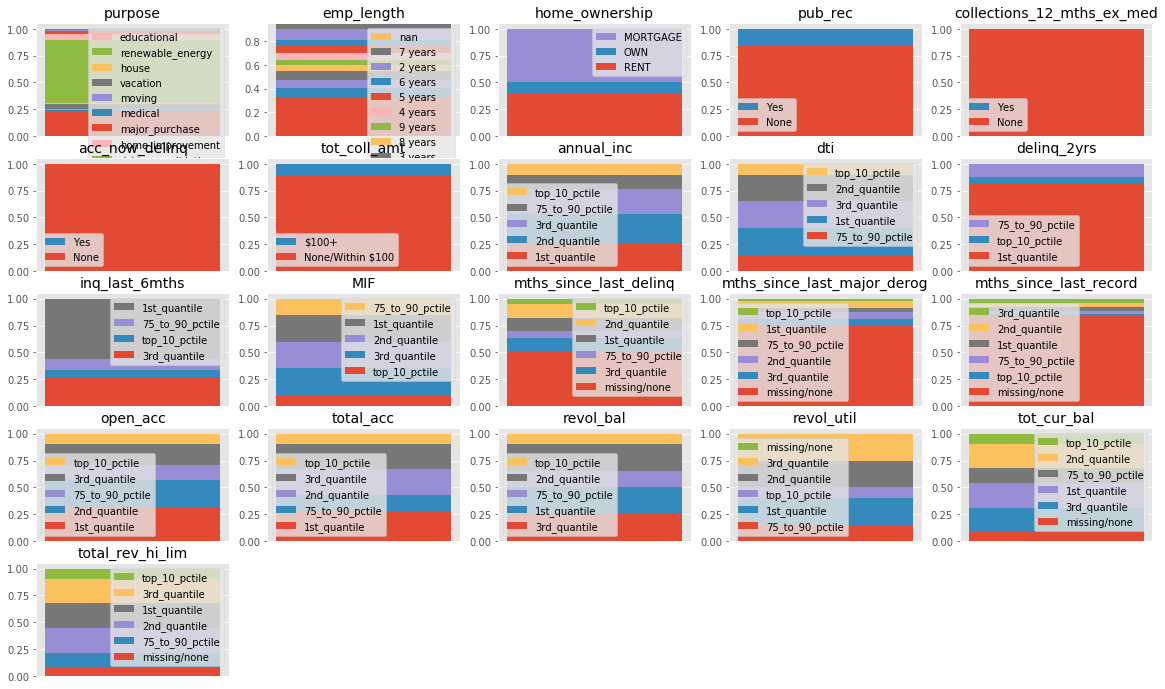

In [563]:
features = loan_t.columns.tolist()
features.remove('co_flag')

fig= plt.figure(figsize=(20,12))
for i in np.arange(len(features)):
    plt.subplot(5,5,i+1)
    stacked_normalized_bar_chart(loan_t, features[i])
   

In [522]:
features

['emp_length',
 'home_ownership',
 'pub_rec',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'MIF',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'tot_cur_bal',
 'total_rev_hi_lim']

### Get rid of features that are extremely concentrated: pub_rec, acct_now_delinq
### Potential refinement on binning:
purpose, emp_length, mths_since_last_record, mths_since_last_major_derog

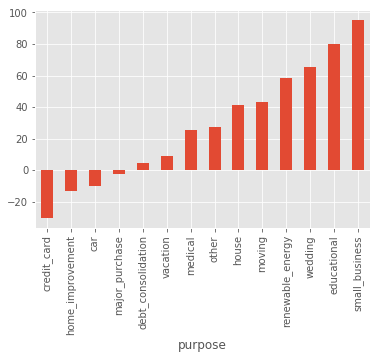

In [564]:
plot_woe(loan_t, 'purpose', 'co_flag')

In [565]:
loan_t['purpose'].value_counts(normalize=True)

debt_consolidation    0.590764
credit_card           0.232357
home_improvement      0.058409
other                 0.048308
major_purchase        0.019470
small_business        0.011694
car                   0.009988
medical               0.009624
moving                0.006101
vacation              0.005337
house                 0.004178
wedding               0.002645
renewable_energy      0.000648
educational           0.000477
Name: purpose, dtype: float64

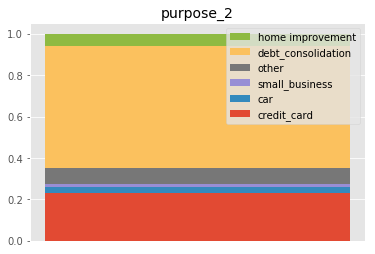

In [567]:
loan_t['purpose_2'] = loan_t['purpose'].apply(lambda x: 'other' if str(x).split('_')[0] in ['other','medical', 'house','moving', 'vacation', 'wedding', 'educational']  
                                                    else ('home improvement' if str(x).split('_')[0] in ['home', 'renewable']
                                                          else ('car' if str(x).split('_')[0] in ('major', 'car')
                                                                else x))
                                                   )

stacked_normalized_bar_chart(loan_t, 'purpose_2')

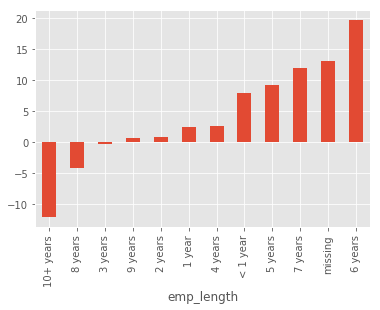

In [568]:
plot_woe(loan_t, 'emp_length', 'co_flag')

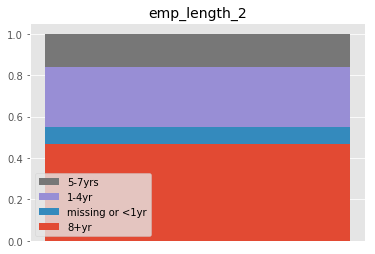

In [573]:
loan_t['emp_length_2'] = loan_t['emp_length'].apply(lambda x: 'missing or <1yr' if str(x).split(' ')[0] in ['m', '<']  
                                                    else ('1-4yr' if str(x).split(' ')[0] in ['1', '2', '3', '4']
                                                          else ('5-7yrs' if str(x).split(' ')[0] in ('5', '6', '7')
                                                                else '8+yr'))
                                                   )

stacked_normalized_bar_chart(loan_t, 'emp_length_2')

In [ ]:
##### Does not work..
#import re
#loan_t = loan_t.assign(emp_length_2 = lambda x: 'missing or <1yr' if x['emp_length'].str.contains('missing|<') 
#                                                else ('1-4yr' if x['emp_length'].str.contains('[1-4]')
#                                                        else ('5-7yrs' if x['emp_length'].str.contains('[5-7]')
#                                                              else '8+yr'))
#                                                   )

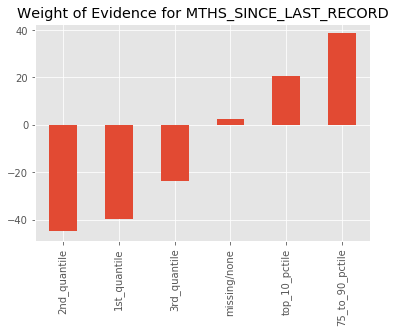

In [467]:
plot_woe(loan_t, 'mths_since_last_record', 'co_flag')
# support regroup as: missing/none, lower 75, top 25

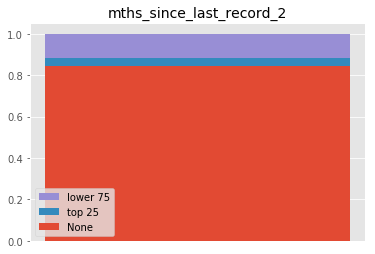

In [574]:
loan_t['mths_since_last_record_2'] = loan_t['mths_since_last_record'].apply(lambda x: 'lower 75' if str(x).split('_')[0] in ['1st', '2nd', '3rd']  
                                                    else ('top 25' if str(x).split('_')[0] in ['top', '75']
                                                          else 'None')
                                                   )

stacked_normalized_bar_chart(loan_t, 'mths_since_last_record_2')

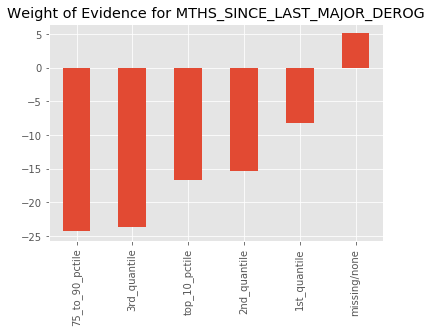

In [470]:
plot_woe(loan_t, 'mths_since_last_major_derog', 'co_flag')

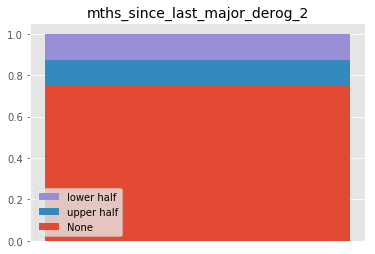

In [575]:
loan_t['mths_since_last_major_derog_2'] = loan_t['mths_since_last_major_derog'].apply(lambda x: 'None' if str(x)=='missing/none'  
                                                    else ('lower half' if str(x).split('_')[0] in ['1st', '2nd']
                                                          else 'upper half')
                                                   )

stacked_normalized_bar_chart(loan_t, 'mths_since_last_major_derog_2')

In [161]:
# variables with extreme outliers:
# annual_inc, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, rev_bal, revol_util, total_acc, tot_cur_bal, total_rev_hi_lim
# tot_coll_amt


# mths_since_last_delinq, mths_since_last_major_derog, mths_since_last_record  
#    --> a lot are missing, and therefore, missing should be grouped separately 
# earliest_cr_line: need to convert to datetime and then calculate mths_since_earliest_cr_line

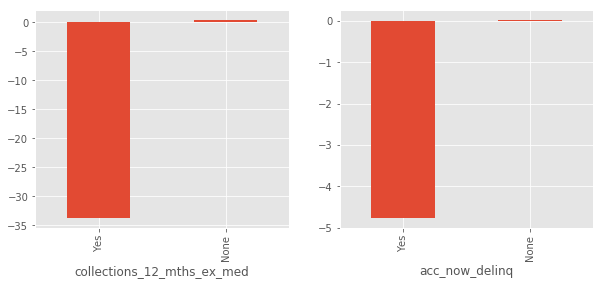

In [481]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_woe(loan_t, 'collections_12_mths_ex_med', 'co_flag')
# conclusion: even if few few apps have collection, but obviously it's a really strong predictor --> keep

plt.subplot(1,2,2)
plot_woe(loan_t, 'acc_now_delinq', 'co_flag')
# acc_now_delinq is not as predictive

In [576]:
features_2 = ['co_flag',
              'purpose_2', 'emp_length_2', 'mths_since_last_major_derog_2', 'mths_since_last_record_2',
              'home_ownership', 'pub_rec', 'collections_12_mths_ex_med','acc_now_delinq',
              'tot_coll_amt', 'annual_inc','dti', 'delinq_2yrs','inq_last_6mths', 'MIF',
              'mths_since_last_delinq', 
              'open_acc', 'total_acc', 'revol_bal','revol_util','tot_cur_bal','total_rev_hi_lim']

# Step 4. Feature Selection based on IV  
__Remove features with IV <0.02__
- Information Value	| Predictive Power
- < 0.02	useless for prediction
- 0.02 - 0.1	weak predictor
- 0.1 - 0.3	medium predictor
- 0.3 - 0.5	strong predictor
- 0.5	suspicious too good to be true

In [492]:
loan_iv = iv(loan_t[features_2], 'co_flag')
loan_iv

/Users/ziweiduan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


,feature,bin,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin,iv_bin,iv_total
0,emp_length_2,1-4yr,16743,241777,0.294569,0.291108,0.064765,1.181783,4.089767e-05,0.005958
1,emp_length_2,5-7yrs,10389,132859,0.182779,0.159967,0.072525,13.331252,3.041181e-03,0.005958
2,emp_length_2,8+yr,24840,390166,0.437024,0.469774,0.059855,-7.226365,2.366635e-03,0.005958
3,emp_length_2,missing or <1yr,4867,65738,0.085628,0.079151,0.068933,7.865397,5.094348e-04,0.005958
4,mths_since_last_major_derog_2,None,44720,620956,0.786784,0.747653,0.067180,5.101398,1.996197e-03,0.009276
5,mths_since_last_major_derog_2,lower half,6504,106796,0.114428,0.128586,0.057405,-11.664972,1.651497e-03,0.009276
6,mths_since_last_major_derog_2,upper half,5615,102788,0.098788,0.123760,0.051797,-22.537364,5.628175e-03,0.009276
7,mths_since_last_record_2,None,49225,701101,0.866043,0.844151,0.065605,2.560305,5.604991e-04,0.017747
8,mths_since_last_record_2,lower 75,4711,98517,0.082883,0.118618,0.045637,-35.847554,1.281004e-02,0.017747
9,mths_since_last_record_2,top 25,2903,30922,0.051074,0.037231,0.085824,31.613016,4.376154e-03,0.017747


In [496]:
loan_iv.loc[loan_iv['co_flag_true'] ==0]
# This is causing iv_total = inf 
# remove these bins!!

,feature,bin,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin,iv_bin,iv_total
25,annual_inc,missing/none,0,4,0.0,0.000005,0.0,-inf,inf,inf
34,delinq_2yrs,missing/none,0,29,0.0,0.000035,0.0,-inf,inf,inf
39,inq_last_6mths,missing/none,0,29,0.0,0.000035,0.0,-inf,inf,inf
45,MIF,missing/none,0,29,0.0,0.000035,0.0,-inf,inf,inf
57,open_acc,missing/none,0,29,0.0,0.000035,0.0,-inf,inf,inf
63,total_acc,missing/none,0,29,0.0,0.000035,0.0,-inf,inf,inf


## _After correcting for log(0) caused by co_flag_true == 0 for some groups

In [577]:
loan_iv = iv(loan_t[features_2], 'co_flag')

loan_iv.groupby('feature').agg({'iv_total':'max'}).sort_values('iv_total')

,iv_total
feature,
acc_now_delinq,0.000010
delinq_2yrs,0.000451
collections_12_mths_ex_med,0.001310
mths_since_last_delinq,0.003580
pub_rec,0.004114
open_acc,0.005655
emp_length_2,0.005962
total_acc,0.006015
MIF,0.006729


### _Because features with IV < 0.02 are usually useless for prediction, I only retain features with IV>=0.02_

In [578]:
feature_selected = loan_iv.groupby('feature').agg({'iv_total':'max'})
feature_selected = feature_selected[feature_selected['iv_total']>=0.02].index.tolist()

print(len(feature_selected),  feature_selected)

7 ['annual_inc', 'home_ownership', 'inq_last_6mths', 'purpose_2', 'revol_util', 'tot_cur_bal', 'total_rev_hi_lim']


# Step 5. Convert the bins back to numeric numbers  (WOE)

_The scorecard is typically built on a logistic regression model where the original numeric inputs are replaced by the WOE calculation. Such transformation in a way standardize the features_

In [593]:
loan_iv_selected = loan_iv.loc[loan_iv['feature'].isin(feature_selected)]
loan_iv_selected

,feature,bin,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin,iv_bin,iv_total
0,purpose_2,car,1599,24541,0.028132,0.029549,0.061171,-4.914829,0.000070,0.044613
1,purpose_2,credit_card,9922,196260,0.174563,0.236312,0.048123,-30.286733,0.018702,0.044613
2,purpose_2,debt_consolidation,35018,489196,0.616091,0.589030,0.066801,4.491745,0.001216,0.044613
3,purpose_2,home improvement,2994,49410,0.052675,0.059493,0.057133,-12.172408,0.000830,0.044613
4,purpose_2,other,5745,62288,0.101075,0.075000,0.084444,29.837958,0.007780,0.044613
5,purpose_2,small_business,1561,8816,0.027464,0.010615,0.150429,95.057685,0.016016,0.044613
16,home_ownership,MORTGAGE,24897,418653,0.438027,0.504091,0.056131,-14.047664,0.009280,0.022081
17,home_ownership,OWN,5237,82232,0.092137,0.099014,0.059873,-7.197724,0.000495,0.022081
18,home_ownership,RENT,26705,329626,0.469836,0.396895,0.074944,16.871060,0.012306,0.022081
27,annual_inc,1st_quantile,18561,205071,0.326554,0.246921,0.082998,27.952481,0.022259,0.056294


In [609]:
def bin_convert_to_woe(iv_df, x):
    '''
        In order to fit a logistic regression, variables are required to be numeric. 
        Therefore, I created a mapper dictionary from the Information Value table, 
        mapping woe value for each bin within a feature
    '''
    df = iv_df.loc[iv_df['feature'] == x, ['bin', 'woe_bin']]
    df.reset_index(inplace=True)
    
    mapper_dict = dict()
    for i in range(len(df)):
        mapper_dict[df.loc[i,'bin']] = df.loc[i,'woe_bin']
    
    return mapper_dict

In [610]:
# final training dataset: loan_f (convert bin back to numeric variable, value being WOE thereof)

loan_f = pd.DataFrame()

for f in feature_selected:
    mapper_dict_f = bin_convert_to_woe(loan_iv_selected, f)
    loan_f[f] = loan_t[f].map(mapper_dict_f) 

In [614]:
loan_f = loan_f.join(loan_t['co_flag'].to_frame())
loan_f.head()

,annual_inc,home_ownership,inq_last_6mths,purpose_2,revol_util,tot_cur_bal,total_rev_hi_lim,co_flag
0,27.952481,16.87106,10.048656,-30.286733,20.080217,90.218016,90.218016,False
1,27.952481,16.87106,58.808736,-4.914829,-27.532404,90.218016,90.218016,True
2,27.952481,16.87106,39.379095,95.057685,29.066352,90.218016,90.218016,False
3,7.722558,16.87106,10.048656,29.837958,-27.532404,90.218016,90.218016,False
4,-11.896059,16.87106,-24.672029,29.837958,-9.148344,90.218016,90.218016,False


# Step 5. Build logistic regression using selected features. 
## SMOTE charge-off obs. to balance the dataset

In [580]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [584]:
!pip install imblearn

    100% |████████████████████████████████| 174kB 533kB/s ta 0:00:01


In [585]:
from imblearn.over_sampling import SMOTE

In [615]:
X = loan_f.loc[:, feature_selected]
y = loan_f.loc[:, 'co_flag'].astype(int)

print(y.sum()/len(y))
# charge-off vs. not charge-off are imbalance, and therefore, I will perform SMOTE 

0.06405476982025131


In [616]:
# Using Synthetic Minority Oversampling Techniques to oversample co_flag == 1 (~6%)
os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=feature_selected)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of charge-off in oversampled data",len(os_data_y[os_data_y['y']==1]))
print("Number of not charge-off", len(os_data_y[os_data_y['y']==0]))
print("Proportion of charge-off obs in oversampled data is {}".format(len(os_data_y[os_data_y['y']==1])/len(os_data_y)))
print("Proportion of not charge-off data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_y))

length of oversampled data is  1162474
Number of charge-off in oversampled data 581237
Number of not charge-off 581237
Proportion of charge-off obs in oversampled data is 0.5
Proportion of not charge-off data in oversampled data is  0.5


In [621]:
# Question: do we need to transform test set ?
os_data_X_test,os_data_y_test = os.fit_sample(X_test, y_test)
os_data_X_test = pd.DataFrame(data=os_data_X_test, columns=feature_selected)
os_data_y_test= pd.DataFrame(data=os_data_y_test,columns=['y'])

## _Use statsmodels.api to implement logistic regression_
Findings:
- The p-values for all 7 features selected are far smaller than 0.05, BRAVO!
- Features ranked by the abs. of est. coefficient:
- __revol_util > inq_last_6mths > purpose > tot_cur_bal = annual_inc > total_rev_hi_lim > home ownership__

In [617]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.651727
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: -1.739      
Dependent Variable: co_flag          AIC:              1156633.8488
Date:               2019-04-16 01:20 BIC:              1156715.7207
No. Observations:   887350           Log-Likelihood:   -5.7831e+05 
Df Model:           6                LL-Null:          -2.1117e+05 
Df Residuals:       887343           LLR p-value:      1.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     4.0000                                         
--------------------------------------------------------------------
                  Coef.   Std.Err.     z      P>|z|   [0.025  0.975]
--------------------------------------------------------------------
annual_inc        0.0065    0.0001   66.0168  0.0000  0.0063  0.0067
home_ownership    0.0019    0.0002   

In [622]:
# Try fitting with sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y)

/Users/ziweiduan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ziweiduan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [623]:
# Predict test set results and calculate accuracy on the test set:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [624]:
# Confusion Matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.76    249274
           1       0.10      0.59      0.17     16931

   micro avg       0.63      0.63      0.63    266205
   macro avg       0.53      0.61      0.47    266205
weighted avg       0.90      0.63      0.73    266205



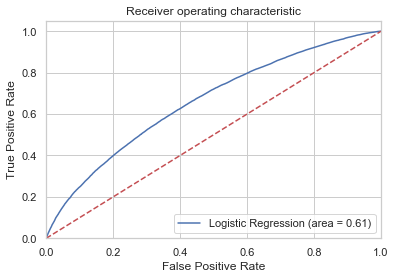

In [625]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## END

In [320]:
woe(loan_t, 'total_rev_hi_lim', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
total_rev_hi_lim,,,,,,
1st_quantile,14144,190210,0.248843,0.229020,0.069213,8.301516
2nd_quantile,12876,191994,0.226535,0.231168,0.062850,-2.024563
3rd_quantile,11543,192729,0.203082,0.232053,0.056508,-13.335248
75_to_90_pctile,5489,116670,0.096571,0.140475,0.044933,-37.474997
top_10_pctile,12787,138937,0.224969,0.167285,0.084278,29.626182


In [319]:
woe(loan_t, 'tot_cur_bal', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
tot_cur_bal,,,,,,
1st_quantile,13569,190718,0.238727,0.229631,0.066421,3.884526
2nd_quantile,12742,191525,0.224177,0.230603,0.062379,-2.826134
3rd_quantile,11534,192740,0.202924,0.232066,0.056463,-13.418955
75_to_90_pctile,5787,116777,0.101814,0.140604,0.047216,-32.279873
top_10_pctile,13207,138780,0.232358,0.167096,0.086896,32.971043


In [318]:
woe(loan_t, 'revol_util', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
revol_util,,,,,,
1st_quantile,10996,211595,0.193459,0.254768,0.049400,-27.528912
2nd_quantile,13053,208997,0.229649,0.251640,0.058784,-9.144852
3rd_quantile,15102,206358,0.265698,0.248462,0.068193,6.706804
75_to_90_pctile,10216,122116,0.179736,0.147032,0.077200,20.083709
top_10_pctile,7472,81474,0.131459,0.098098,0.084006,29.273213


In [317]:
woe(loan_t,'revol_bal','co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
revol_bal,,,,,,
1st_quantile,14944,206904,0.262918,0.249120,0.067361,5.390835
2nd_quantile,14943,206932,0.262900,0.249154,0.067349,5.370611
3rd_quantile,14675,207146,0.258185,0.249411,0.066157,3.457489
75_to_90_pctile,8046,125057,0.141558,0.150573,0.060449,-6.174118
top_10_pctile,4231,84501,0.074438,0.101742,0.047683,-31.247162


In [316]:
woe(loan_t, 'total_acc', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
total_acc,,,,,,
1st_quantile,17547,231698,0.308714,0.278973,0.070401,10.130158
2nd_quantile,14434,206988,0.253945,0.249221,0.065188,1.877910
3rd_quantile,12480,191806,0.219568,0.230941,0.061091,-5.050370
75_to_90_pctile,7494,120220,0.131846,0.144749,0.058678,-9.336732
top_10_pctile,4884,79828,0.085927,0.096116,0.057654,-11.205638


In [314]:
woe(loan_t, 'mths_since_last_record', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
mths_since_last_record,,,,,,
1st_quantile,1533,33305,0.026971,0.040100,0.044004,-39.662755
2nd_quantile,1458,33370,0.025651,0.040179,0.041863,-44.873828
3rd_quantile,1720,31842,0.030261,0.038339,0.051248,-23.660850
75_to_90_pctile,1845,18342,0.032460,0.022084,0.091395,38.513915
top_10_pctile,50283,713681,0.884657,0.859298,0.065819,2.908435


In [315]:
woe(loan_t, 'open_acc', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
open_acc,,,,,,
1st_quantile,18404,257791,0.323792,0.310390,0.066634,4.227224
2nd_quantile,15531,215340,0.273245,0.259277,0.067271,5.247323
3rd_quantile,10864,158282,0.191136,0.190577,0.064229,0.292970
75_to_90_pctile,7348,115329,0.129277,0.138860,0.059897,-7.150736
top_10_pctile,4692,83798,0.082549,0.100896,0.053023,-20.069683


In [313]:
woe(loan_t, 'mths_since_last_major_derog', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
mths_since_last_major_derog,,,,,,
1st_quantile,3453,54811,0.060751,0.065994,0.059265,-8.279410
2nd_quantile,3051,51985,0.053678,0.062592,0.055436,-15.363243
3rd_quantile,2733,50600,0.048083,0.060924,0.051244,-23.669829
75_to_90_pctile,1786,33272,0.031422,0.040061,0.050944,-24.288434
top_10_pctile,45816,639872,0.806066,0.770429,0.066818,4.521860


In [311]:
woe(loan_t, 'MIF', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
MIF,,,,,,
1st_quantile,14603,208655,0.256919,0.251228,0.065409,2.239820
2nd_quantile,15053,205828,0.264836,0.247824,0.068150,6.638982
3rd_quantile,14876,208879,0.261722,0.251498,0.066483,3.984742
75_to_90_pctile,7622,124037,0.134098,0.149345,0.057892,-10.768772
top_10_pctile,4685,83141,0.082426,0.100105,0.053344,-19.431866


In [310]:
woe(loan_t, 'inq_last_6mths', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
inq_last_6mths,,,,,,
1st_quantile,25274,472631,0.444659,0.569065,0.050761,-24.668538
3rd_quantile,16989,224505,0.298897,0.270312,0.070350,10.052148
75_to_90_pctile,8670,85447,0.152536,0.102881,0.092119,39.382587
top_10_pctile,5906,47957,0.103908,0.057742,0.109649,58.751739


In [312]:
woe(loan_t, 'mths_since_last_delinq', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
mths_since_last_delinq,,,,,,
1st_quantile,6926,102299,0.121853,0.123172,0.063410,-1.076407
2nd_quantile,6656,105402,0.117103,0.126908,0.059398,-8.040953
3rd_quantile,6336,99638,0.111473,0.119968,0.059788,-7.344258
75_to_90_pctile,3662,58934,0.064428,0.070959,0.058502,-9.655535
top_10_pctile,33259,464267,0.585144,0.558994,0.066849,4.571897


In [309]:
woe(loan_t, 'delinq_2yrs', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
delinq_2yrs,,,,,,
1st_quantile,46362,670599,0.815672,0.807425,0.064665,1.016220
75_to_90_pctile,6929,106295,0.121906,0.127983,0.061197,-4.864936
top_10_pctile,3548,53646,0.062422,0.064592,0.062034,-3.416946


In [304]:
woe(loan_t, 'annual_inc', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
annual_inc,,,,,,
1st_quantile,18561,205083,0.326554,0.246927,0.082994,27.950121
2nd_quantile,16895,228519,0.297243,0.275145,0.068843,7.725174
3rd_quantile,11778,193839,0.207217,0.233389,0.057281,-11.894115
75_to_90_pctile,5956,118065,0.104787,0.142155,0.048024,-30.498282
top_10_pctile,3649,85034,0.064199,0.102384,0.041147,-46.674464


In [303]:
woe(loan_t, 'tot_coll_amt', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
tot_coll_amt,,,,,,
$100+,4536,89033,0.079804,0.107199,0.048478,-29.510814
None/Within $100,52303,741507,0.920196,0.892801,0.065889,3.022251


In [305]:
woe(loan_t, 'dti', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
dti,,,,,,
1st_quantile,12438,209611,0.218829,0.252379,0.056015,-14.264375
2nd_quantile,13605,208039,0.239360,0.250486,0.061382,-4.543481
3rd_quantile,15511,206573,0.272894,0.248721,0.069843,9.274897
75_to_90_pctile,9703,123179,0.170710,0.148312,0.073020,14.064992
top_10_pctile,5582,83138,0.098207,0.100101,0.062917,-1.910136


In [300]:
woe(loan_t, 'pub_rec', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
pub_rec,,,,,,
None,49336,702265,0.867996,0.845552,0.065641,2.619659
Yes,7503,128275,0.132004,0.154448,0.055259,-15.702007


In [301]:
woe(loan_t, 'collections_12_mths_ex_med', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
collections_12_mths_ex_med,,,,,,
None,56295,819403,0.990429,0.986591,0.064286,0.388308
Yes,544,11137,0.009571,0.013409,0.046571,-33.722555


In [302]:
woe(loan_t, 'acc_now_delinq', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,true_prob,woe_bin
acc_now_delinq,,,,,,
None,56587,826678,0.995566,0.99535,0.064066,0.021740
Yes,252,3862,0.004434,0.00465,0.061254,-4.765799


,co_flag_true,co_flag_false,y_true_dist,y_false_dist,woe_i
verification_status,,,,,
Not Verified,14729,252021,0.259135,0.303442,-15.784070
Source Verified,18465,311093,0.324865,0.374567,-14.236147
Verified,23645,267426,0.416000,0.321991,25.616217


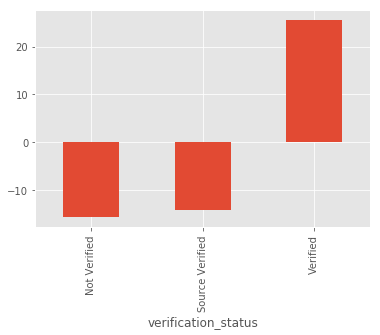

In [118]:
woe(loan, 'verification_status', 'co_flag')

,co_flag_true,co_flag_false,y_true_dist,y_false_dist,woe_i
term,,,,,
36 months,36109,585016,0.635286,0.70438,-10.324367
60 months,20730,245524,0.364714,0.29562,21.004061


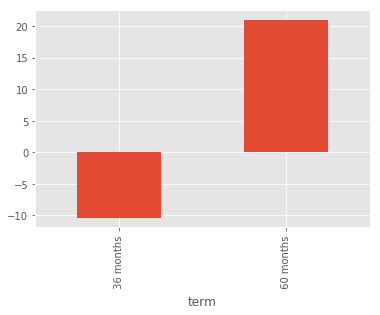

In [119]:
woe(loan, 'term', 'co_flag')

In [48]:
loan['co_flag'].sum()

56839

In [42]:
loan.groupby('emp_length').agg({'co_flag': lambda s: s.astype(int).sum()})

,co_flag
emp_length,
1 year,3741
10+ years,16657
2 years,5087
3 years,4468
4 years,3447
5 years,3888
6 years,3306
7 years,3195
8 years,2707


In [23]:
loan.dtypes

emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
term                            object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
collections_12_mths_ex_med     float64
mths_since_last_major_derog    float64
acc_now_delinq                 float64
tot_coll_amt                   float64
tot_cur_bal                    float64
total_rev_hi_lim               float64
loan_amnt                      float64
loan_status                     object
out_prncp                

In [ ]:
def emp_length_bin(s):
    if s.str.split(' ')[0].contains('<|')